## APS360 Timeseries Baseline Model: Periodic Air Traffic Flow Forecasting Using Spatio-Temporal Convolutional Graph Neural Networks

Helen J Li

Group members: Arash Ahmadian Dehkordi, Callum McKelvie, Breno Pinho

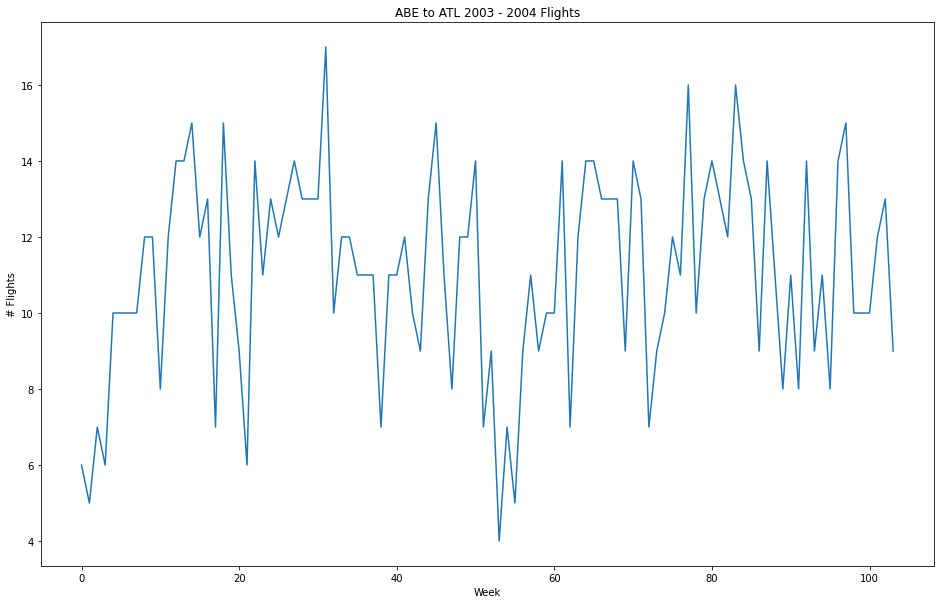

In [16]:
import  matplotlib.pyplot as plt
import pandas as pd

# read csv file for the first flight
abe_to_atl = pd.read_csv('/content/matrix.csv', header = 0, usecols = ["['ABE', 'ATL']"], nrows = 104)
df = abe_to_atl.plot()
df.get_legend().remove()
plt.title('ABE to ATL 2003 - 2004 Flights')
plt.xlabel('Week')
plt.ylabel('# Flights')
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

In [6]:
# convert week numbers to date times so time series forecast model ARIMA can understand
df1 = pd.DataFrame({"Week": list(range(0,52)), "Year": 2003})
df1['Dates'] = pd.to_datetime(df1.Week.astype(str)+
                           df1.Year.astype(str).add('-1') ,format='%V%G-%u')
df2 = pd.DataFrame({"Week": list(range(0,52)), "Year": 2004})
df2['Dates'] = pd.to_datetime(df2.Week.astype(str)+
                           df2.Year.astype(str).add('-1') ,format='%V%G-%u')
frame = pd.concat([df1, df2])

# update csv object with new date time values
abe_to_atl.index = frame['Dates']
pd.set_option('display.max_rows', None)
abe_to_atl.head()

,"['ABE', 'ATL']"
Dates,
2002-12-23,6.0
2002-12-30,5.0
2003-01-06,7.0
2003-01-13,6.0
2003-01-20,10.0


In [7]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 8.2 MB/s 
     |████████████████████████████████| 9.8 MB 33.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [8]:
# eliminates time consuming parameter tuning processes and selects the best combination for you
from pmdarima.arima import auto_arima

model = auto_arima(abe_to_atl, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

# split csv information into training and testing batches
train = abe_to_atl.loc['2002-12-23':'2004-09-06']
test = abe_to_atl.loc['2004-09-06':]

# train the model to the training data and predict 15 weeks in advance
model.fit(train)
forecast = model.predict(n_periods=15)
print(forecast)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=552.442, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=511.641, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=525.671, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=488.627, Time=0.25 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=481.182, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=482.982, Time=1.01 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=507.491, Time=0.37 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=478.848, Time=0.87 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=485.963, Time=0.39 sec
 ARIMA(2,1,0)(2,1,2)[12]             : AIC=480.724, T

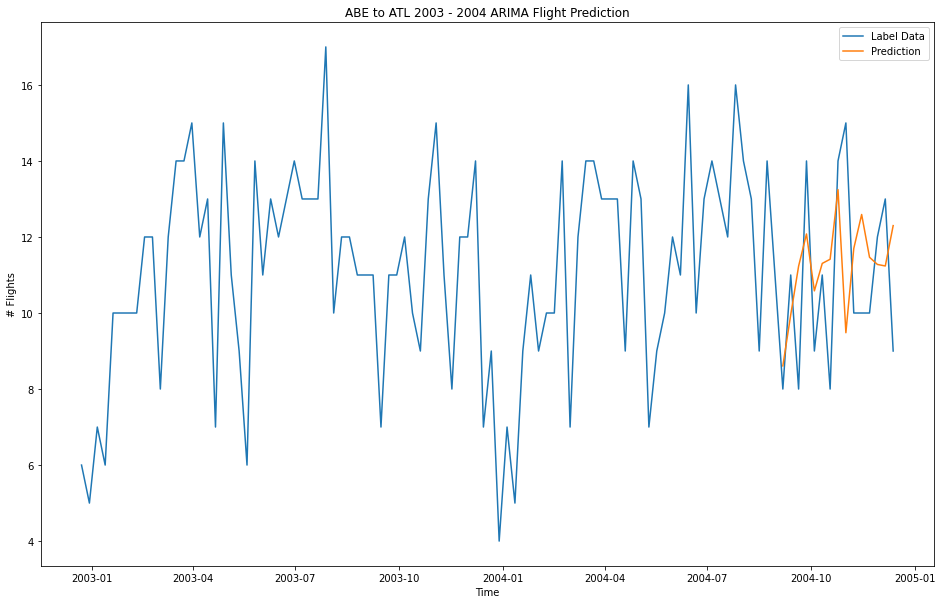

In [15]:
#plot the predictions for validation set
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
plt.plot(abe_to_atl, label='Label Data')
plt.plot(forecast, label='Prediction')
plt.title('ABE to ATL 2003 - 2004 ARIMA Flight Prediction')
plt.xlabel('Time')
plt.ylabel('# Flights')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()